In [23]:
import os
from datetime import datetime, timedelta
from itertools import chain

import plotly.graph_objects as go
import mplfinance as mlf
import pandas as pd
import yfinance

In [ ]:
ROOT_FOLDER = '.'
OUTPUT_FOLDER = 'data'
REPLACE = False

In [3]:
def download_security(
        security: str,
        start_date: datetime,
        end_date: datetime,
        time_frame: str
) -> pd.DataFrame:
    df = yfinance.download(
        tickers=security,
        start=start_date,
        end=end_date,
        interval=time_frame
    )
    df = df.droplevel(1, axis=1)
    return df

In [4]:
def get_folder_nm(
        security: str,
        time_frame: str
) -> str:
    return os.path.join(ROOT_FOLDER, OUTPUT_FOLDER, security, time_frame)

In [5]:
def get_file_name(
        security: str,
        start_date: datetime,
        end_date: datetime,
        time_frame: str
) -> str:
    return f'{security}_{time_frame}_{start_date}_{end_date}.parquet'

In [6]:
def path_handler(
        security: str,
        start_date: datetime,
        end_date: datetime,
        time_frame: str
) -> str:
    folder_path = os.path.join(ROOT_FOLDER, OUTPUT_FOLDER, security, time_frame)
    file_nm = f'{security}_{time_frame}_{start_date}_{end_date}.parquet'
    file_path = os.path.join(folder_path, file_nm)

    if os.path.exists(file_path):
        raise FileExistsError(f'The file has been already downloaded')
    else:
        os.makedirs(folder_path, exist_ok=True)
    return file_path

In [7]:
def save_security(df: pd.DataFrame, file_path: str) -> None:
    df.to_parquet(path=file_path, compression='gzip', index=False)

3. Создать код на Python, который загрузит на ваш локальный компьютер данные о
котировках ценных бумаг из списка SnP500 и котировки криптовалют (BTC, ETH, SOL,
XRP).

In [11]:
sp500_tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META'] 
crypto_tickers = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD']

start_date = '2024-01-01'
end_date = '2024-11-01'
time_frame = '1d'


for security in chain(sp500_tickers, crypto_tickers):
    print(f'\n{security}')
    
    try:
        file_path = path_handler(security, start_date, end_date, time_frame)
    except FileExistsError as e:
        print(str(e))
        if REPLACE:
            print('Replacing...')
        else:
            print('Skipping.')
            continue

    print(f'Downloading...')
    df = download_security(security, start_date, end_date, time_frame)
    print(f'Done. {len(df)} rows')

    save_security(df, file_path)
    print(f'Saved to: {file_path}')


AAPL
The file has been already downloaded
Skipping.

MSFT
The file has been already downloaded
Skipping.

AMZN
The file has been already downloaded
Skipping.

GOOG
The file has been already downloaded
Skipping.

META
The file has been already downloaded
Skipping.

BTC-USD
The file has been already downloaded
Skipping.

ETH-USD
The file has been already downloaded
Skipping.

SOL-USD
The file has been already downloaded
Skipping.

XRP-USD
The file has been already downloaded
Skipping.


4. Поскольку вам предстоит много работать с ними в дальнейшем, подготовьте
автоматическое отображение графиков текущей ситуации.

In [21]:
security = 'AAPL'
last_n_days = 7
time_frame = '1h'

start_date = datetime.now() - timedelta(days=last_n_days)
end_date = datetime.now()

security_df = download_security(security, start_date, end_date, time_frame)

candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=security_df.index,
            open=security_df['Open'],
            high=security_df['High'],
            low=security_df['Low'],
            close=security_df['Close']
        )
    ]
)

candlestick.update_layout(
    title=f'{security} Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    xaxis_rangeslider_visible=False
)

candlestick.show()

[*********************100%***********************]  1 of 1 completed


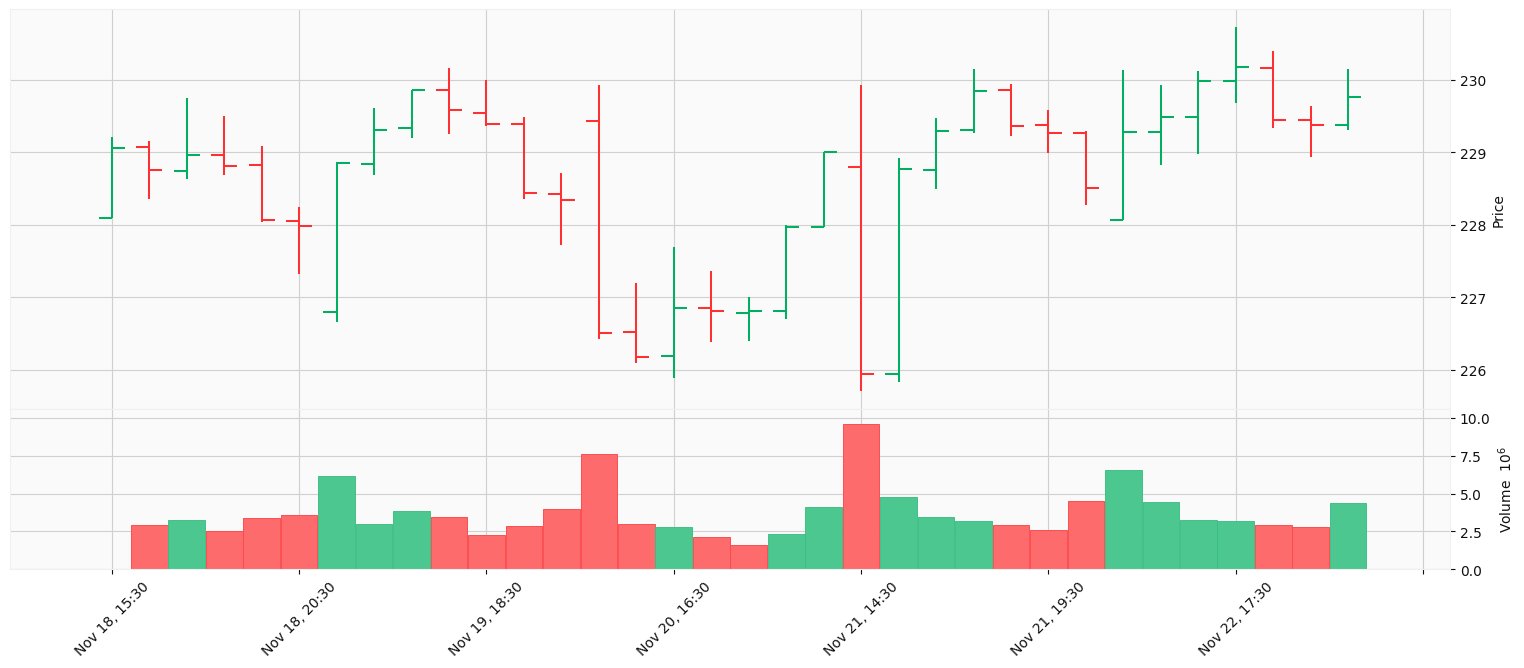

In [28]:
mlf.plot(security_df, volume=True, style='yahoo', figsize=(20, 8));